# Importing importing packages and libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#conda install -c conda-forge wordcloud=1.6.0

# Reading the dataset

In [3]:
medium_df = pd.read_csv("medium_post_titles.csv")

In [4]:
medium_df

,category,title,subtitle,subtitle_truncated_flag
0,work,"""21 Conversations"" - A fun (and easy) game for...",A (new?) Icebreaker game to get your team to s...,False
1,spirituality,"""Biblical Porn"" at Mars Hill",Author and UW lecturer Jessica Johnson talks a...,False
2,lgbtqia,"""CISGENDER?! Is That A Disease?!""","Or, a primer in gender vocabulary for the curi...",False
3,equality,"""Call me Nat Love"" :Black Cowboys and the Fron...",NaN,False
4,artificial-intelligence,"""Can I Train my Model on Your Computer?""",How we waste computational resources and how t...,False
...,...,...,...,...
126413,javascript,🚀 Introducing Akita: A New State Management Pa...,Every developer knows state management is diff...,True
126414,cryptocurrency,🚀Sudden Bitcoin Price Breakout Sets New Bull T...,Short-term trend: Bullish (but overbought),False
126415,artificial-intelligence,🤖 Hack4th0n & RASA chatbot,Past week I took part in an internal Hackathon...,True
126416,artificial-intelligence,🤖AI Diary #4,Topics in this issue include deep learning app...,True


# Exploring the dataset (EDA)

In [5]:
medium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126418 entries, 0 to 126417
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   category                 126418 non-null  object
 1   title                    126418 non-null  object
 2   subtitle                 124931 non-null  object
 3   subtitle_truncated_flag  126418 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 3.0+ MB


In [6]:
medium_df.isnull().sum()

category                      0
title                         0
subtitle                   1487
subtitle_truncated_flag       0
dtype: int64

In [7]:
medium_df.describe()

,category,title,subtitle,subtitle_truncated_flag
count,126418,126418,124931,126418
unique,93,126095,122191,2
top,culture,DisruptED TV Magazine,Introduction,False
freq,5070,7,187,83029


In [8]:
#Rows with missing values are cleared since they were very less 
medium_df.drop(medium_df[medium_df.subtitle.isna()].index, inplace=True) 
len(medium_df)

124931

In [9]:
#resetting the index
medium_df.reset_index(drop=True, inplace=True)
medium_df

,category,title,subtitle,subtitle_truncated_flag
0,work,"""21 Conversations"" - A fun (and easy) game for...",A (new?) Icebreaker game to get your team to s...,False
1,spirituality,"""Biblical Porn"" at Mars Hill",Author and UW lecturer Jessica Johnson talks a...,False
2,lgbtqia,"""CISGENDER?! Is That A Disease?!""","Or, a primer in gender vocabulary for the curi...",False
3,artificial-intelligence,"""Can I Train my Model on Your Computer?""",How we waste computational resources and how t...,False
4,cryptocurrency,"""Cypherpunks and Wall Street"": The Security To...",Bruce Fenton presents at the World Blockchain ...,False
...,...,...,...,...
124926,javascript,🚀 Infinite Currying in Javascript,Javascript is an interesting language with a l...,True
124927,javascript,🚀 Introducing Akita: A New State Management Pa...,Every developer knows state management is diff...,True
124928,cryptocurrency,🚀Sudden Bitcoin Price Breakout Sets New Bull T...,Short-term trend: Bullish (but overbought),False
124929,artificial-intelligence,🤖 Hack4th0n & RASA chatbot,Past week I took part in an internal Hackathon...,True


In [10]:
#joining the titles and subtitles to get better results

medium_df["text"] = ""
for row in range(len(medium_df)):
    medium_df["text"][row] = medium_df.title[row]+" "+medium_df.subtitle[row]
medium_df

,category,title,subtitle,subtitle_truncated_flag,text
0,work,"""21 Conversations"" - A fun (and easy) game for...",A (new?) Icebreaker game to get your team to s...,False,"""21 Conversations"" - A fun (and easy) game for..."
1,spirituality,"""Biblical Porn"" at Mars Hill",Author and UW lecturer Jessica Johnson talks a...,False,"""Biblical Porn"" at Mars Hill Author and UW lec..."
2,lgbtqia,"""CISGENDER?! Is That A Disease?!""","Or, a primer in gender vocabulary for the curi...",False,"""CISGENDER?! Is That A Disease?!"" Or, a primer..."
3,artificial-intelligence,"""Can I Train my Model on Your Computer?""",How we waste computational resources and how t...,False,"""Can I Train my Model on Your Computer?"" How w..."
4,cryptocurrency,"""Cypherpunks and Wall Street"": The Security To...",Bruce Fenton presents at the World Blockchain ...,False,"""Cypherpunks and Wall Street"": The Security To..."
...,...,...,...,...,...
124926,javascript,🚀 Infinite Currying in Javascript,Javascript is an interesting language with a l...,True,🚀 Infinite Currying in Javascript Javascript i...
124927,javascript,🚀 Introducing Akita: A New State Management Pa...,Every developer knows state management is diff...,True,🚀 Introducing Akita: A New State Management Pa...
124928,cryptocurrency,🚀Sudden Bitcoin Price Breakout Sets New Bull T...,Short-term trend: Bullish (but overbought),False,🚀Sudden Bitcoin Price Breakout Sets New Bull T...
124929,artificial-intelligence,🤖 Hack4th0n & RASA chatbot,Past week I took part in an internal Hackathon...,True,🤖 Hack4th0n & RASA chatbot Past week I took pa...


# Dropping the irrelevant columns 

In [11]:
medium_df.drop(columns=['title','subtitle','subtitle_truncated_flag'], inplace=True)

# Data Preprocessing

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocessing(text):
    text = re.sub(r'\W+',' ',text)
    text = re.sub(r'\s+',' ',text)    
    text = text.lower()
    result = ''
    for word in word_tokenize(text):
        if word not in list(stopwords.words('english')):
            result += word + ' '
            
    return result

In [13]:
medium_df["text"] = medium_df.text.apply(preprocessing)

In [14]:
medium_df

,category,text
0,work,21 conversations fun easy game teams get know ...
1,spirituality,biblical porn mars hill author uw lecturer jes...
2,lgbtqia,cisgender disease primer gender vocabulary cur...
3,artificial-intelligence,train model computer waste computational resou...
4,cryptocurrency,cypherpunks wall street security token revolut...
...,...,...
124926,javascript,infinite currying javascript javascript intere...
124927,javascript,introducing akita new state management pattern...
124928,cryptocurrency,sudden bitcoin price breakout sets new bull ta...
124929,artificial-intelligence,hack4th0n rasa chatbot past week took part int...


# Finding the word frequency in the dataset

In [15]:
medium_df["text"] = medium_df['text'].str.lower().str.replace('[^\w\s]','')
 
medium_df_new = medium_df.text.str.split(expand=True).stack().value_counts().reset_index()
medium_df_new.columns = ['Word', 'Frequency'] 
 
medium_df_new

,Word,Frequency
0,one,8505
1,new,7635
2,time,6713
3,people,5988
4,world,5545
...,...,...
69825,xapo,1
69826,twerktastic,1
69827,convulsions,1
69828,libcluster,1


# Generating word cloud of the words 

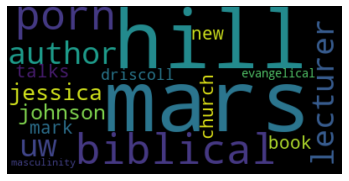

In [16]:
text1 = medium_df.text[1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1080x720 with 0 Axes>

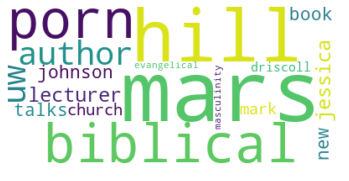

In [17]:
# lowering max_font_size, change the maximum number of word and lighten the background
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text1)
plt.figure(figsize=(15,10))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
text1 = " ".join(txt for txt in medium_df.text)
print ("There are {} words in the combination of all texts.".format(len(text1)))

There are 12267180 words in the combination of all texts.


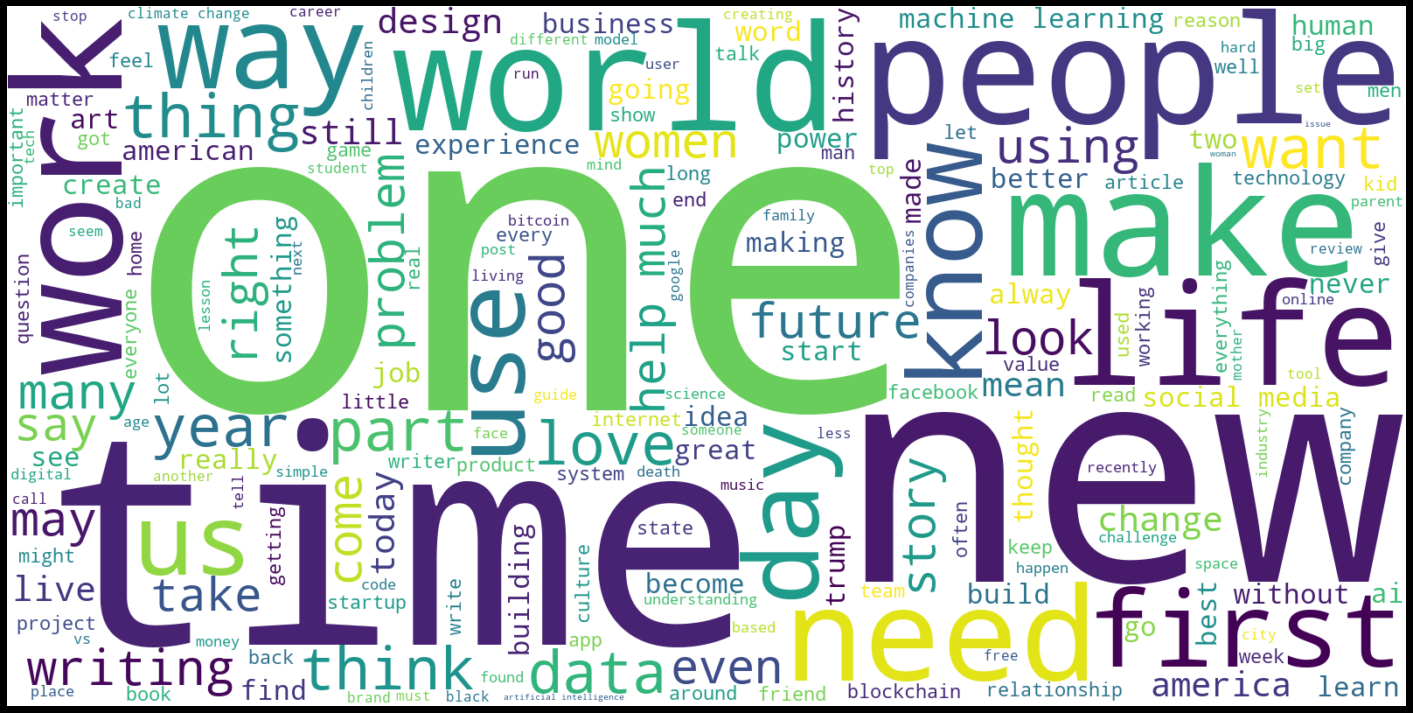

In [19]:
# Generate a word cloud image
wordcloud = WordCloud( width=1600, height=800,background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [20]:
from PIL import Image

medium_mask = np.array(Image.open("medium logo.png"))
medium_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

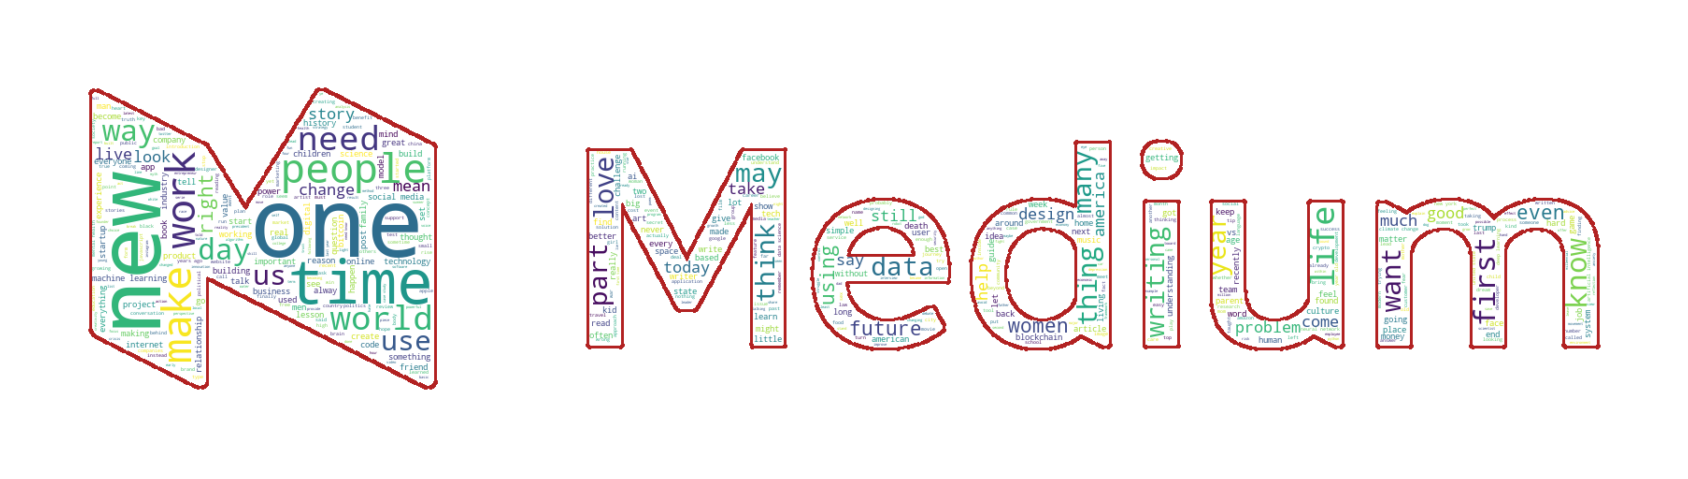

In [21]:
wc = WordCloud(background_color="white", max_words=500, mask=medium_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text1)

# store to file
wc.to_file("medium logo wordcloud.png")

# show
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Finding how many unique categories (Topics) we have in the dataset

In [22]:
medium_df.category.unique()

array(['work', 'spirituality', 'lgbtqia', 'artificial-intelligence',
       'cryptocurrency', 'politics', 'health', 'culture', 'poetry',
       'true-crime', 'sexuality', 'family', 'cybersecurity',
       'relationships', 'music', 'environment', 'software-engineering',
       'education', 'history', 'mental-health', 'fiction', 'social-media',
       'ux', 'media', 'lifestyle', 'film', 'world', 'design',
       'javascript', 'books', 'economy', 'travel', 'equality', 'cities',
       'art', 'startups', 'psychology', 'digital-life', 'gun-control',
       'photography', 'religion', 'technology', 'space', 'programming',
       'business', 'justice', 'future', 'election-2020', 'podcasts',
       'women', 'sports', 'money', 'humor', 'science', 'accessibility',
       'marketing', 'philosophy', 'writing', 'machine-learning',
       'blockchain', 'data-science', 'freelancing', 'product-management',
       'creativity', 'android-development', 'basic-income',
       'visual-design', 'neuroscience

In [23]:
len(medium_df.category.unique())

93

# Plotting the word frequency

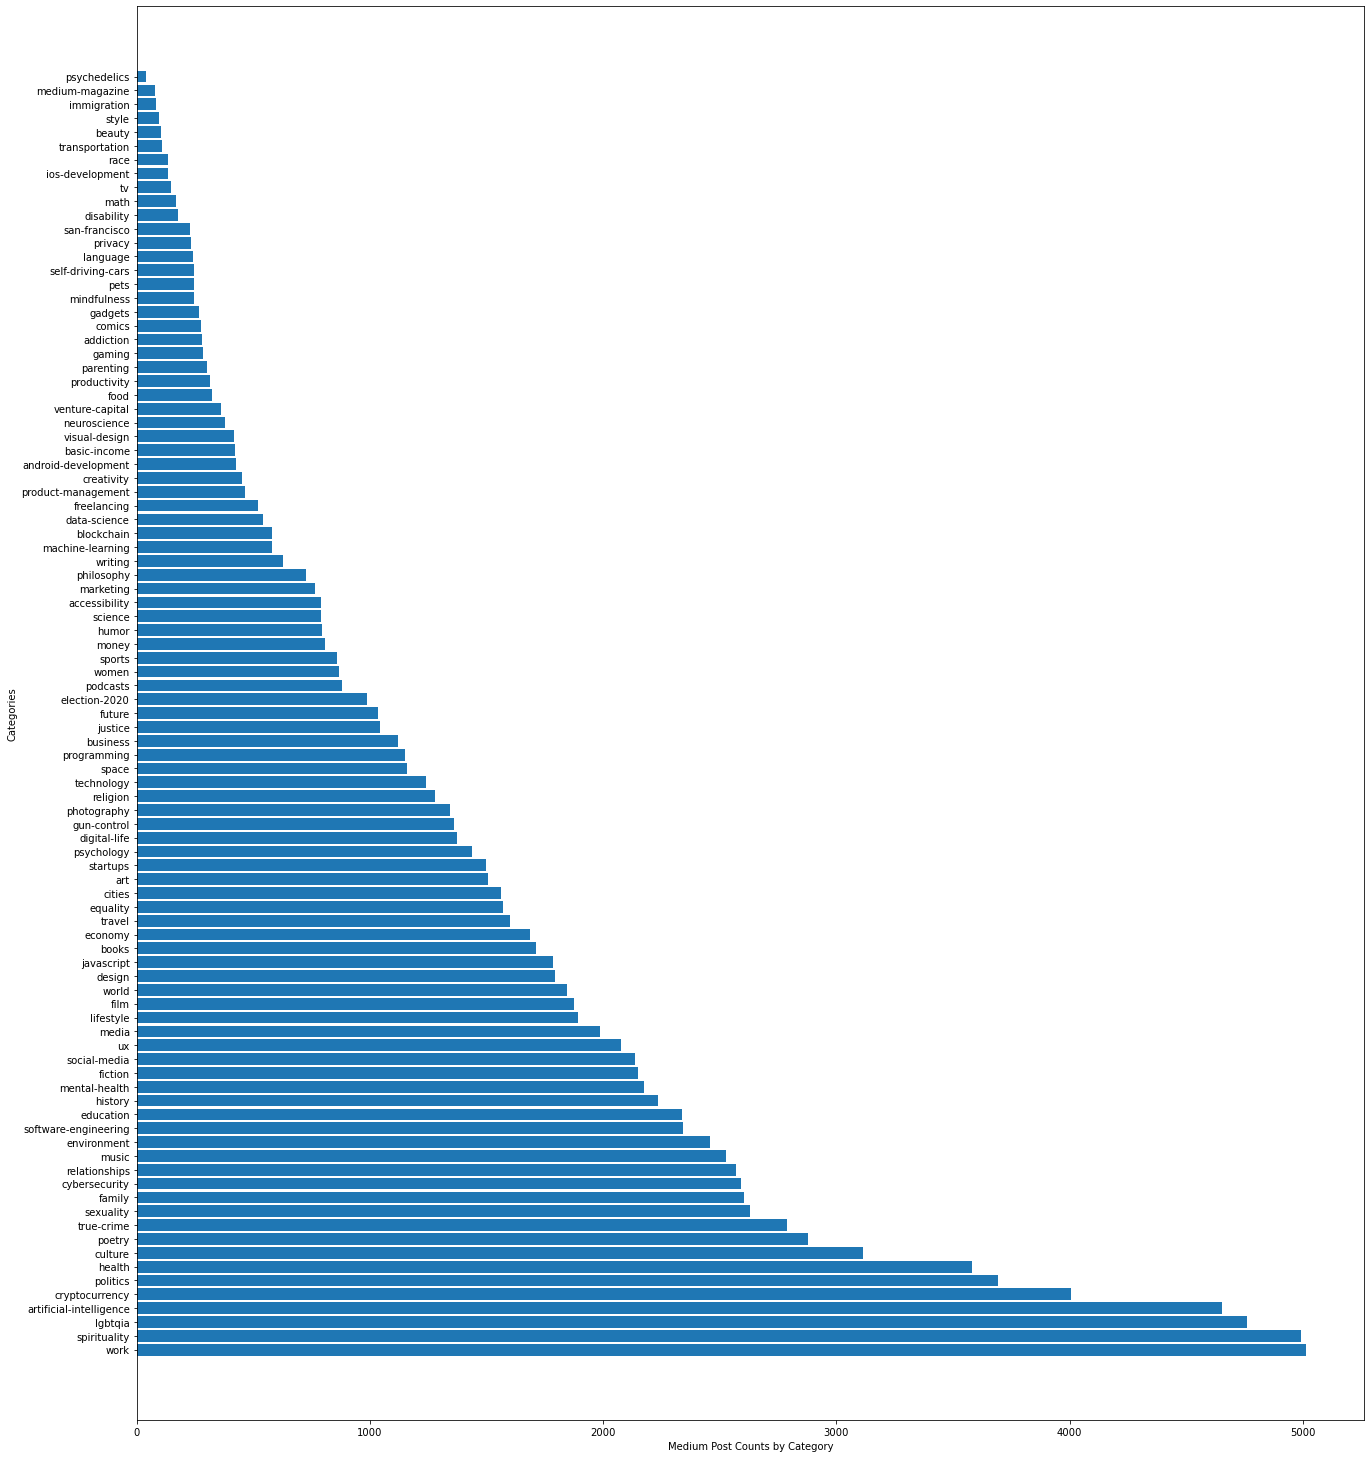

In [24]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(22,26))
plt.barh(medium_df.category.unique(), medium_df.category.value_counts(), height=0.85, align='center')
plt.xlabel('Medium Post Counts by Category')
plt.ylabel('Categories')
plt.show()

In [25]:
medium_df

,category,text
0,work,21 conversations fun easy game teams get know ...
1,spirituality,biblical porn mars hill author uw lecturer jes...
2,lgbtqia,cisgender disease primer gender vocabulary cur...
3,artificial-intelligence,train model computer waste computational resou...
4,cryptocurrency,cypherpunks wall street security token revolut...
...,...,...
124926,javascript,infinite currying javascript javascript intere...
124927,javascript,introducing akita new state management pattern...
124928,cryptocurrency,sudden bitcoin price breakout sets new bull ta...
124929,artificial-intelligence,hack4th0n rasa chatbot past week took part int...


# BiGrams and TriGrams Analysis 

In [26]:
import nltk

In [27]:
medium_df["bigrams"] = medium_df['text'].apply(lambda row: list(nltk.bigrams(row.split(' ')))) 

medium_df

,category,text,bigrams
0,work,21 conversations fun easy game teams get know ...,"[(21, conversations), (conversations, fun), (f..."
1,spirituality,biblical porn mars hill author uw lecturer jes...,"[(biblical, porn), (porn, mars), (mars, hill),..."
2,lgbtqia,cisgender disease primer gender vocabulary cur...,"[(cisgender, disease), (disease, primer), (pri..."
3,artificial-intelligence,train model computer waste computational resou...,"[(train, model), (model, computer), (computer,..."
4,cryptocurrency,cypherpunks wall street security token revolut...,"[(cypherpunks, wall), (wall, street), (street,..."
...,...,...,...
124926,javascript,infinite currying javascript javascript intere...,"[(infinite, currying), (currying, javascript),..."
124927,javascript,introducing akita new state management pattern...,"[(introducing, akita), (akita, new), (new, sta..."
124928,cryptocurrency,sudden bitcoin price breakout sets new bull ta...,"[(sudden, bitcoin), (bitcoin, price), (price, ..."
124929,artificial-intelligence,hack4th0n rasa chatbot past week took part int...,"[(hack4th0n, rasa), (rasa, chatbot), (chatbot,..."


In [28]:
medium_df["trigrams"] = medium_df['text'].apply(lambda row: list(nltk.trigrams(row.split(' ')))) 

medium_df

,category,text,bigrams,trigrams
0,work,21 conversations fun easy game teams get know ...,"[(21, conversations), (conversations, fun), (f...","[(21, conversations, fun), (conversations, fun..."
1,spirituality,biblical porn mars hill author uw lecturer jes...,"[(biblical, porn), (porn, mars), (mars, hill),...","[(biblical, porn, mars), (porn, mars, hill), (..."
2,lgbtqia,cisgender disease primer gender vocabulary cur...,"[(cisgender, disease), (disease, primer), (pri...","[(cisgender, disease, primer), (disease, prime..."
3,artificial-intelligence,train model computer waste computational resou...,"[(train, model), (model, computer), (computer,...","[(train, model, computer), (model, computer, w..."
4,cryptocurrency,cypherpunks wall street security token revolut...,"[(cypherpunks, wall), (wall, street), (street,...","[(cypherpunks, wall, street), (wall, street, s..."
...,...,...,...,...
124926,javascript,infinite currying javascript javascript intere...,"[(infinite, currying), (currying, javascript),...","[(infinite, currying, javascript), (currying, ..."
124927,javascript,introducing akita new state management pattern...,"[(introducing, akita), (akita, new), (new, sta...","[(introducing, akita, new), (akita, new, state..."
124928,cryptocurrency,sudden bitcoin price breakout sets new bull ta...,"[(sudden, bitcoin), (bitcoin, price), (price, ...","[(sudden, bitcoin, price), (bitcoin, price, br..."
124929,artificial-intelligence,hack4th0n rasa chatbot past week took part int...,"[(hack4th0n, rasa), (rasa, chatbot), (chatbot,...","[(hack4th0n, rasa, chatbot), (rasa, chatbot, p..."


# Data Modelling
# Splitting Data into Train and Test 

In [29]:
from sklearn.model_selection import train_test_split

X = medium_df.text
y = medium_df.category


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Applying Logistic Regression

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(n_jobs=1,max_iter =100, C=1e5))
])


model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('accuracy: ', accuracy_score(y_pred, y_test))

accuracy:  0.44275023011966225


# Applying SGD Classifier 

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3
                          , random_state=42, max_iter=1000, tol=1e-3))
])

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('accuracy: ', accuracy_score(y_pred, y_test))

accuracy:  0.4554768479609397


In [34]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

          accessibility       0.43      0.50      0.46        32
              addiction       0.47      0.34      0.39       100
    android-development       0.68      0.72      0.70       138
                    art       0.42      0.48      0.45       269
artificial-intelligence       0.50      0.59      0.54       557
           basic-income       0.71      0.63      0.67        35
                 beauty       0.26      0.19      0.22        54
             blockchain       0.53      0.50      0.52       261
                  books       0.36      0.23      0.28       211
               business       0.46      0.36      0.41       734
                 cities       0.22      0.14      0.17        94
                 comics       0.34      0.25      0.29       166
             creativity       0.28      0.17      0.21       147
         cryptocurrency       0.53      0.73      0.62       399
                culture 

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test, y_pred))

[[ 16   0   0 ...   1   0   2]
 [  0  34   0 ...   0   0   0]
 [  0   0 100 ...   0   0   1]
 ...
 [  0   1   1 ... 483   3  39]
 [  0   0   0 ...   3  82   2]
 [  0   0   1 ...  11   1 654]]
